https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# Plotting

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    # 노트북 상에서 그래프 표시

* 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처\
import matplotlib as mpl\
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

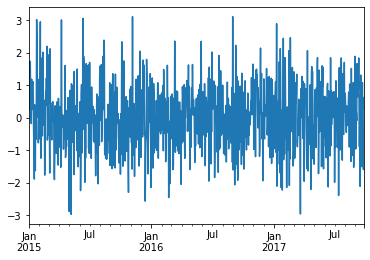

In [9]:
s = pd.Series(np.random.randn(1000),
             index=pd.date_range('1/1/2015',periods=1000))
s.plot()

<AxesSubplot:>

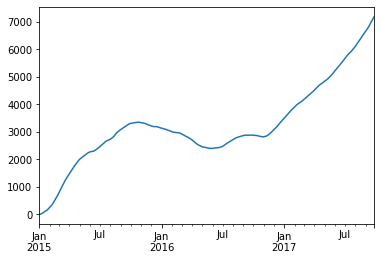

In [11]:
s = s.cumsum()
s.plot()

In [12]:
r = s.rolling(window=60)
    # window 사이즈만큼 값을 이동
    # 이동평균 구할 때 사용
r

Rolling [window=60,center=False,axis=0]

In [13]:
r.mean()

2015-01-01            NaN
2015-01-02            NaN
2015-01-03            NaN
2015-01-04            NaN
2015-01-05            NaN
                 ...     
2017-09-22    6526.294742
2017-09-23    6544.970499
2017-09-24    6563.790901
2017-09-25    6582.737128
2017-09-26    6601.806828
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

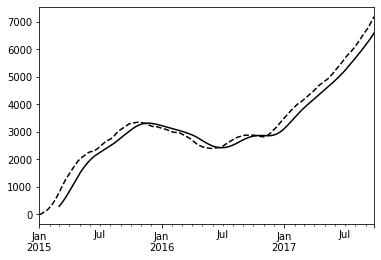

In [15]:
# 이동평균
s.plot(style = 'k--')
r.mean().plot(style='k')

In [24]:
df = pd.DataFrame(np.random.randn(1000,4),
                 index=pd.date_range('1/1/2000',periods=1000),
                 columns=['A','B','C','D'])
df

,A,B,C,D
2000-01-01,0.137787,1.598603,-0.185878,-0.708396
2000-01-02,-1.918432,-0.435425,0.251137,-0.349609
2000-01-03,1.271502,0.177302,0.118260,1.977548
2000-01-04,-0.820949,1.304927,1.345134,1.068023
2000-01-05,-0.526608,-1.251070,0.669107,-0.256936
...,...,...,...,...
2002-09-22,-0.476233,1.051645,-1.026212,-2.837342
2002-09-23,-0.625973,0.798504,-0.675102,-0.347468
2002-09-24,-0.081742,-1.254222,1.524328,-0.852994
2002-09-25,-0.190000,-0.236188,0.387001,0.402715


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

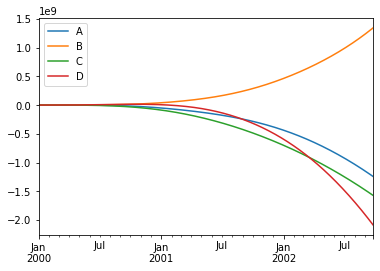

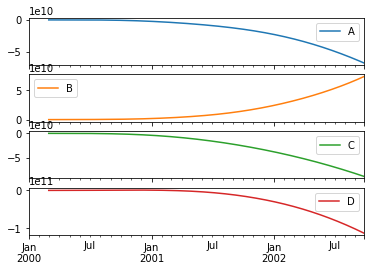

In [28]:
df = df.cumsum()
df.plot()
df.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

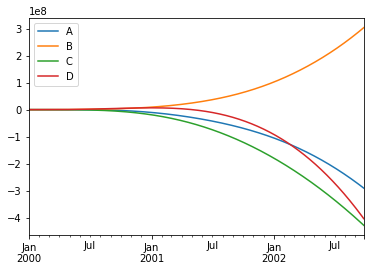

In [30]:
df.rolling(window=len(df),min_periods=1).mean()[:5]
df.rolling(window=len(df),min_periods=1).mean().plot()

<AxesSubplot:>

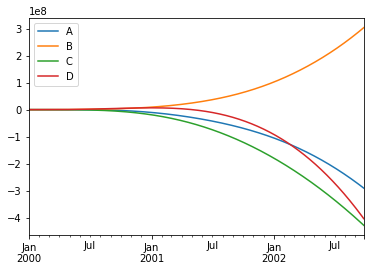

In [32]:
df.expanding(min_periods=1).mean().plot()

In [33]:
df.expanding?

In [37]:
dfe = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

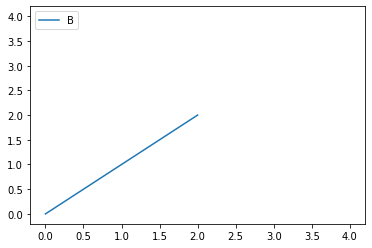

In [38]:
dfe.plot()

In [36]:
dfe.expanding(2).sum() # 누적합

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

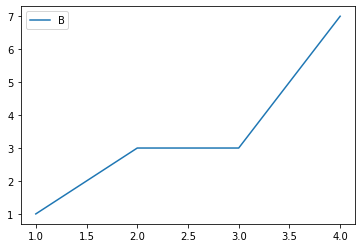

In [39]:
dfe.expanding(2).sum().plot()

<AxesSubplot:>

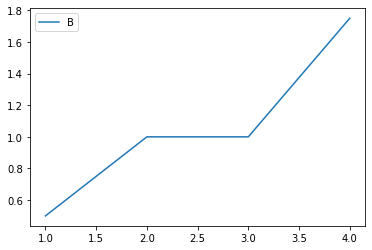

In [41]:
dfe.expanding(2).mean().plot()

# Pandas Bar Plot

In [42]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01    1.086372
2000-01-02   -0.060819
2000-01-03    0.733303
2000-01-04   -0.764548
2000-01-05    1.336357
Freq: D, dtype: float64

In [43]:
df = pd.DataFrame(np.random.randn(1000,4),
                 index=ts.index, columns=list('ABCD'))
df.head()

,A,B,C,D
2000-01-01,2.302539,-0.510591,-0.269463,0.998642
2000-01-02,-0.702213,-0.490495,-0.514762,-0.348490
2000-01-03,-1.201125,-0.595299,0.851363,-0.973256
2000-01-04,-0.022899,-1.961958,0.604088,-0.815710
2000-01-05,0.827361,-0.241813,0.473396,1.681799


In [44]:
df.tail(2)

,A,B,C,D
2002-09-25,-0.574050,-0.263161,-1.245790,0.905051
2002-09-26,-0.620545,-1.186313,-0.323224,0.353091


In [46]:
df.iloc[5]

A    0.475556
B   -0.932453
C    0.601491
D   -1.143450
Name: 2000-01-06 00:00:00, dtype: float64

<AxesSubplot:>

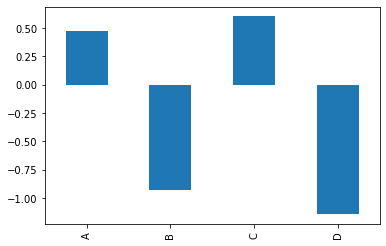

In [45]:
df.iloc[5].plot(kind='bar') # iloc : index 번호

<AxesSubplot:>

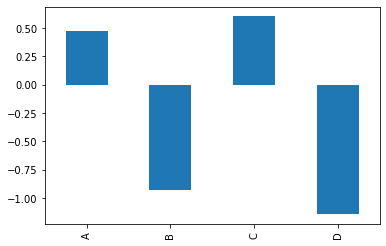

In [48]:
df.iloc[5].plot.bar()

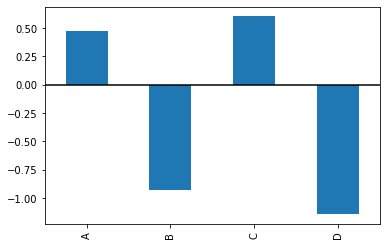

In [51]:
df.iloc[5].plot.bar()
plt.axhline(0,color='k')

In [54]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.head(3)

,a,b,c,d
0,0.951731,0.865219,0.406076,0.910557
1,0.576998,0.450703,0.952503,0.903400
2,0.292704,0.176075,0.573643,0.867588


<AxesSubplot:>

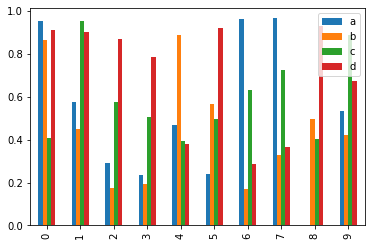

In [55]:
df2.plot.bar()

<AxesSubplot:>

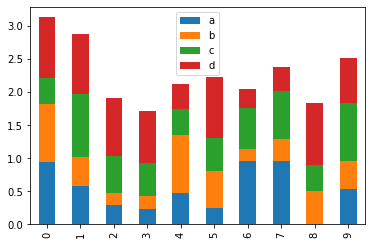

In [56]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

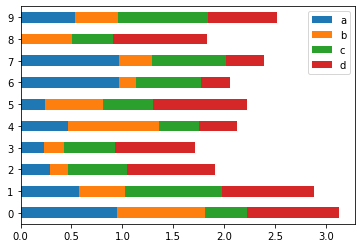

In [57]:
df2.plot.barh(stacked=True)